<a href="https://colab.research.google.com/github/imrohu/NLP/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
1+2


3

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

dataset=pd.read_csv('/content/drive/My Drive/housing.csv')
dataset=dataset.dropna()
dataset.head(1)
dataset.iloc[:10,:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# New Section

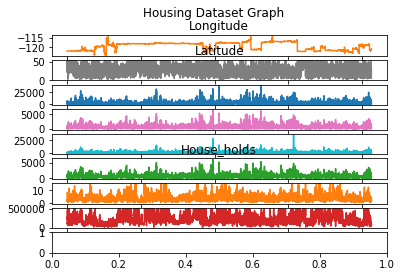

In [188]:
Y=dataset['median_house_value']
A=dataset['longitude']
B=dataset['housing_median_age']
C=dataset['total_rooms']
D=dataset['total_bedrooms']
E=dataset['population']
F=dataset['households']
G=dataset['median_income']

X=dataset.loc[:,'longitude':'median_income']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2003)
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(9)
fig.suptitle('Housing Dataset Graph')
axs[0].plot(A,'tab:orange', label='longitude')
axs[0].set_title('Longitude')
axs[1].plot(B,'tab:gray')
axs[1].set_title('Latitude')
axs[2].plot(C,'tab:blue')
axs[3].plot(D,'tab:pink')
axs[4].plot(E,'tab:cyan')
axs[5].plot(F,'tab:green')
axs[5].set_title('House_holds')
axs[6].plot(G,'tab:orange')
axs[7].plot(Y,'tab:red')

#plt.plot(X)


In [0]:
import torch
from torch.nn import Conv1d
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu
from torch.utils.data import DataLoader, TensorDataset


In [0]:
class Oneoneonesixzerofourone(torch.nn.Module):
  def __init__(self,batch_size,inputs,outputs):
    super(Oneoneonesixzerofourone,self).__init__()
    self.batch_size=batch_size
    self.inputs=inputs
    self.outputs=outputs

    self.input_layer=Conv1d(inputs,batch_size,1)
    self.max_pooling_layer=MaxPool1d(1)
    self.conv_layer=Conv1d(batch_size,128,1)
    self.flattern_layer=Flatten()
    self.liner_layer=Linear(128,64)

    self.output_layer=Linear(64,outputs)

  def feed(self,input):
    input=input.reshape((self.batch_size,self.inputs,1))
    output=relu(self.input_layer(input))
    output=self.max_pooling_layer(output)
    output=relu(self.conv_layer(output))
    output=self.flattern_layer(output)
    output=self.liner_layer(output)
    output=self.output_layer(output)
    return output





In [191]:
from torch.optim import SGD
from torch.nn import  L1Loss
!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score


In [192]:
batch_size = 512
model=Oneoneonesixzerofourone(batch_size, X.shape[1], 1)
model.cuda()

Oneoneonesixzerofourone(
  (input_layer): Conv1d(8, 512, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(512, 128, kernel_size=(1,), stride=(1,))
  (flattern_layer): Flatten()
  (liner_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

batch_size = 100
model=CnnRegressor(batch_size, X.shape[1], 1)
model.cuda()

In [0]:
def model_loss(model, dataset, train=False, optimizer=None):
  performance=L1Loss()
  score_metric=R2Score()

  avg_loss=100
  avg_score=100
  count=100

  for input, output in iter(dataset):
    predictions=model.feed(input)
    loss=performance(predictions, output)
    score_metric.update([predictions,output])
    score=score_metric.compute()

    if(train):
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    avg_loss +=loss.item()
    avg_score += score
    count +=1

  return avg_loss / count , avg_score / count

In [0]:
epochs = 500
optimizer = SGD(model.parameters(),lr=1e-5)

inputs=torch.from_numpy(x_train_np).cuda().float()
outputs=torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()

tensor=TensorDataset(inputs,outputs)
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)

for epoch in range(epochs):
  avg_loss,avg_r2_score=model_loss(model,loader,train=True, optimizer=optimizer)

  #print("epoch"+str(epoch+1)+ ":\n\tloss ="+ str(avg_loss)+ "\n\tR2 score =" + str(avg_r2_score))
  

In [195]:
inputs=torch.from_numpy(x_test_np).cuda().float()
outputs=torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()
#CreateaDataLoaderinstancetoworkwithourbatches
tensor=TensorDataset(inputs,outputs)
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)
#Outputtheaverageperformanceofthemodel
avg_loss,avg_r2_score=model_loss(model,loader)
print("Themodel'sL1lossis:"+str(avg_loss))
print("Themodel'sR^2scoreis:"+str(avg_r2_score))

Themodel'sL1lossis:7077.211852477478
Themodel'sR^2scoreis:0.9343909842926238
